### **Воронцова Алина Владимировна**
### ИУ5-22М
### Вариант 4

*Задача №1: 4*
- Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "label encoding".

*Задача №2: 24*
- Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе 5% и 95% квантилей.

*Дополнительно:*
- Для произвольной колонки данных построить гистограмму.

### **Задача №1**

В качестве примера возьмем популярный набор данных "Titanic" из открытых источников.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Загрузка набора данных Titanic с помощью pandas
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Предварительный анализ данных
print("Первые 5 строк набора данных Titanic:")
print(df.head())

print("\nИнформация о наборе данных:")
print(df.info())

# Выберем категориальный признак для кодирования, например, 'Sex'
print("\nУникальные значения в столбце 'Sex':")
print(df['Sex'].unique())

# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Применяем label encoding к столбцу 'Sex'
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])

print("\nПервые 5 строк набора данных после применения label encoding к столбцу 'Sex':")
print(df[['Sex', 'Sex_encoded']].head())


Первые 5 строк набора данных Titanic:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

### **Задача №2**
Проведем данную работу на признаке Age

In [2]:

# Выберем числовой признак для анализа выбросов, например, 'Age'
print("\nСтатистическая информация о столбце 'Age':")
print(df['Age'].describe())

# Рассчитаем 5% и 95% квантили для столбца 'Age'
q_low = df['Age'].quantile(0.05)
q_high = df['Age'].quantile(0.95)

print(f"\n5% квантиль для 'Age': {q_low}")
print(f"95% квантиль для 'Age': {q_high}")

# Удалим выбросы на основе этих квантилей
df_filtered = df[(df['Age'] >= q_low) & (df['Age'] <= q_high)]

print("\nСтатистическая информация о столбце 'Age' после удаления выбросов:")
print(df_filtered['Age'].describe())

print("\nПервые 5 строк набора данных после удаления выбросов:")
print(df_filtered.head())



Статистическая информация о столбце 'Age':
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

5% квантиль для 'Age': 4.0
95% квантиль для 'Age': 56.0

Статистическая информация о столбце 'Age' после удаления выбросов:
count    649.000000
mean      29.184129
std       11.537395
min        4.000000
25%       21.000000
50%       28.000000
75%       36.000000
max       56.000000
Name: Age, dtype: float64

Первые 5 строк набора данных после удаления выбросов:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Fl

### **Дополнительно**

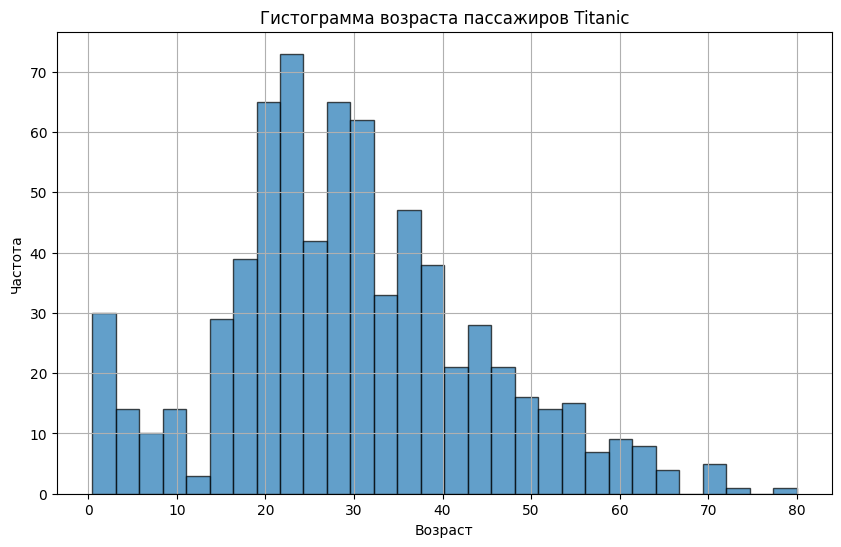

In [3]:
import matplotlib.pyplot as plt

# Построение гистограммы для столбца 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Гистограмма возраста пассажиров Titanic')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(True)
plt.show()
